In [1]:
import numpy as np

from keras.datasets import fashion_mnist as mnist

from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.utils import to_categorical

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.
/Users/tentenich/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =  x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

In [7]:
model.fit(x_train, y_train, 
          batch_size=64, epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.5088 - acc: 0.8171 - val_loss: 0.4121 - val_acc: 0.8511
Epoch 2/10
60000/60000 [==============================] - 43s 714us/step - loss: 0.3859 - acc: 0.8582 - val_loss: 0.3748 - val_acc: 0.8617
Epoch 3/10
60000/60000 [==============================] - 47s 775us/step - loss: 0.3505 - acc: 0.8714 - val_loss: 0.3487 - val_acc: 0.8733
Epoch 4/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.3352 - acc: 0.8746 - val_loss: 0.3684 - val_acc: 0.8648
Epoch 5/10
60000/60000 [==============================] - 42s 692us/step - loss: 0.3160 - acc: 0.8833 - val_loss: 0.3642 - val_acc: 0.8711
Epoch 6/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.3048 - acc: 0.8870 - val_loss: 0.3365 - val_acc: 0.8798
Epoch 7/10
60000/60000 [==============================] - 33s 542us/step - loss: 0.2930 - acc: 0.8899 - val_loss: 0.

In [8]:
model.evaluate(x_test, y_test, verbose=0)

[0.33732885749340058, 0.87970000000000004]

In [9]:
tmp_model = Model(model.inputs, model.layers[-2].output)

In [10]:
def softmax(x, t=1.0):
    x_exp = np.exp(x / t)
    return x_exp / x_exp.sum(axis=1, keepdims=True)

In [11]:
result = {}
for t in tqdm_notebook([1, 4, 16, 32, 128]):
    probs_train = softmax(tmp_model.predict(x_train), t=10)
    for k in tqdm_notebook(range(2, 8), leave=False):
        new_model = Sequential()
        new_model.add(Flatten(input_shape=(28, 28)))
        new_model.add(Dense(512 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(256 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(10))
        new_model.add(Activation('softmax'))

        new_model.compile('adam', 'kullback_leibler_divergence', metrics=['accuracy'])

        new_model.fit(x_train, probs_train, 
                      batch_size=64, epochs=10,
                      validation_data=(x_test, y_test), verbose=0)
        
        result[(t, k)] = new_model.evaluate(x_test, y_test, verbose=0)
        print(result[(t, k)])

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1669988160133362, 0.84299999999999997]
[1.2398902673721313, 0.82230000000000003]
[1.2956529656410218, 0.72470000000000001]
[1.4244512098312379, 0.60909999999999997]
[1.6455307523727416, 0.45689999999999997]
[1.8388499662399291, 0.44330000000000003]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1782121329307556, 0.85580000000000001]
[1.1997837825775146, 0.83499999999999996]
[1.2927645238876342, 0.75370000000000004]
[1.3732114331245422, 0.61629999999999996]
[1.5854132637023926, 0.502]
[1.9745964275360108, 0.27329999999999999]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1971533603668212, 0.85619999999999996]
[1.2383922478675842, 0.81659999999999999]
[1.2890478141784667, 0.76649999999999996]
[1.4238563024520874, 0.61370000000000002]
[1.5789125045776367, 0.49299999999999999]
[1.8444282627105713, 0.41889999999999999]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.2002977197647096, 0.84630000000000005]
[1.2177450578689575, 0.82369999999999999]
[1.2819756113052367, 0.79090000000000005]
[1.3993512513160706, 0.56689999999999996]
[1.6517489692687988, 0.47489999999999999]
[1.9801278686523438, 0.2792]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[1.1814528100967407, 0.85019999999999996]
[1.2247882466316222, 0.82369999999999999]
[1.2721406158447266, 0.77380000000000004]
[1.4227315647125245, 0.60840000000000005]
[1.5856623649597168, 0.4975]
[1.9163854682922363, 0.28799999999999998]



In [12]:
result_baseline = {}

for k in tqdm_notebook(range(2, 8), leave=False):
    new_model = Sequential()
    new_model.add(Flatten(input_shape=(28, 28)))
    new_model.add(Dense(512 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(256 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(10))
    new_model.add(Activation('softmax'))

    new_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

    new_model.fit(x_train, y_train, 
                  batch_size=64, epochs=10,
                  validation_data=(x_test, y_test), verbose=0)
        
    result_baseline[k] = new_model.evaluate(x_test, y_test, verbose=0)
    print(result_baseline[k])

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.34734366161823271, 0.87490000000000001]
[0.35934051780700682, 0.87629999999999997]
[0.39978528811931607, 0.86109999999999998]
[0.51885488924980161, 0.83320000000000005]
[0.74625239562988277, 0.77490000000000003]
[1.1882811880111694, 0.60770000000000002]


In [13]:
result_baseline

{2: [0.34734366161823271, 0.87490000000000001],
 3: [0.35934051780700682, 0.87629999999999997],
 4: [0.39978528811931607, 0.86109999999999998],
 5: [0.51885488924980161, 0.83320000000000005],
 6: [0.74625239562988277, 0.77490000000000003],
 7: [1.1882811880111694, 0.60770000000000002]}

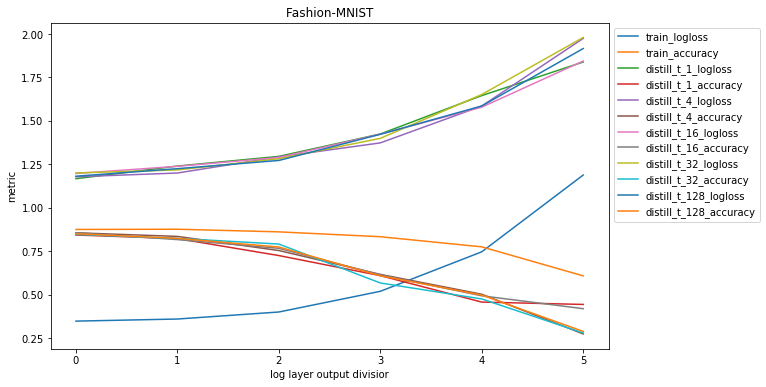

In [19]:
legend = []

plt.figure(figsize=(10, 6))
plt.title('Fashion-MNIST')

    
plt.plot([result_baseline[i] for i in range(2, 8)])
legend = ['train_logloss', 'train_accuracy']

for t in [1, 4, 16, 32, 128]:
    plt.plot([result[(t, i)] for i in range(2, 8)])
  
    legend += ['distill_t_{}_logloss'.format(t), 
               'distill_t_{}_accuracy'.format(t)]
    
plt.ylabel('metric')
plt.xlabel('log layer output divisior')
plt.legend(legend, bbox_to_anchor=(1.0, 1.0))